In [1]:
import numpy as np
import pandas as pd
import os 
import sys
import time
import matplotlib.pyplot as plt

# 벤다이어그램용
%matplotlib inline
import venn

In [ ]:
#         if self.region == 'jamsil' :
#             for i in self.dataDict.keys():
#                 if i == '{}_TPatientVitalTemp.csv'.format(self.region):
#                     pass
#                 else:
#                     sheetPatientIDSet = set(self.dataDict[i]['PatientID'])
#                     self.commonPatientIDSet = sheetPatientIDSet & self.commonPatientIDSet
#                     # 잠실은 2018년 08월 05일 이후 데이터가 없어서 전체 공통으로하게 된다면 18년 05월 08일 이후로 새로 온 사람들은
#                     # 포함되지 않아서 잠실은 commonPatientID를 구할 때 vitalTemp를 고려하지 않겠음.                 
#         else:
                    
#     def vennDiagramJamsil(self):
#         self.inbodySet        = set(self.dataDict['{}_TInBodyAdditionalData.csv'.format(self.region)]['PatientID'])
#         self.privateSet       = set(self.dataDict['{}_private.csv'.format(self.region)]['PatientID'])
#         self.medicationSet    = set(self.dataDict['{}_TMedication.csv'.format(self.region)]['PatientID'])
#         self.medicalRecordSet = set(self.dataDict['{}_TMedicalRecord.csv'.format(self.region)]['PatientID'])

    
#         self.labels = venn.get_labels([self.inbodySet,self.privateSet,self.medicationSet,self.medicalRecordSet])
#         # augument 로 fill을 안써도 되는구나 ( pilot 보면 여기에 써놓음)
#         fig,ax = venn.venn4(self.labels,names = ['inbody','private','medication','medicalRecord'])

In [131]:
class commonIndexExtraction:
    
    def __init__(self, region):
        self.path = os.getcwd()[:-5] + f'\\region\\{region}' #'\\region\\{}'.format(region) 
        self.region = region

    def makeDir(self):
        self.newPath = os.path.join(f'{self.path}\\0_commonPatientID') 
         
        if not os.path.exists(self.newPath):
            os.makedirs(os.path.join(f'{self.path}\\0_commonPatientID'))
        else:
            print('이미 존재합니다.')
        
        # 0_ 은 파일리스트 뽑을 때 commonPatientID 디렉토리를 맨 앞에 두기 위해서 해놓음.
    
    def fileList(self):
        self.fileList = os.listdir(self.path)[1:] 
        
    def dataSet(self):
        self.dataDict = {}
        for i in self.fileList:
            self.dataDict[i] = pd.read_csv(self.path+'\\{}'.format(i), encoding = 'utf-16', index_col = 0)
        print('All files are added')
    
    # Tmedication에는 환자정보와 시간이 없어서 만들기위해 TMedicalRecord와 MedicalRecordID를 key로서 사용하여 연결
    def Tmedication(self):
        
        #2024 버전의 데이터에 맞춰 변경
        temp = self.dataDict[f'{self.region}_tmedicalrecord.csv'][['MedicalRecordID','PatientID','ConsultTime']]

        
        #저장하는 형식으로 코드 수정
        self.dataDict['{}_tmedication.csv'.format(self.region)] = \
            pd.merge(temp,self.dataDict['{}_tmedication.csv'.format(self.region)], how = 'inner', on = 'MedicalRecordID')

        
        
    def patientChartNo(self):
        self.dataDict[f'{self.region}_tpatientpersonal.csv'] = \
        self.dataDict[f'{self.region}_tpatientpersonal.csv'].loc[self.dataDict[f'{self.region}_tpatientpersonal.csv']['PatientChartNo'].notnull()]
        
    def commonPatientIDExtraction_raw(self):
        self.commonPatientIDSet = set(self.dataDict[f'{self.region}_tpatientpersonal.csv']['PatientID'])

        for i in self.dataDict.keys():
            sheetPatientIDSet = set(self.dataDict[i]['PatientID'])
            self.commonPatientIDSet = sheetPatientIDSet & self.commonPatientIDSet
            print(f'{i},{len(self.commonPatientIDSet)}')
            print(f'sheetPatientIDSet,{len(sheetPatientIDSet)}')
            print(f'commonPatientIDSet,{len(self.commonPatientIDSet)}')

        self.commonPatientID = list(self.commonPatientIDSet)
        self.commonPatientID.sort()
        
        
    def countUniquePatientID(self):
        for i in self.dataDict.keys():
            sheetPatientIDSet = self.dataDict[i]['PatientID']
            print(f'{i} sheetPatientIDSet,{len(sheetPatientIDSet)}')
            sheetPatientIDSet = set(self.dataDict[i]['PatientID'])
            print(f'{i} sheetPatientIDSet,{len(sheetPatientIDSet)}')

    def vennDiagram(self):
        self.inbodySet        = set(self.dataDict['{}_tinbodyadditionaldata.csv'.format(self.region)]['PatientID'])
        self.privateSet       = set(self.dataDict[f'{self.region}_tpatientpersonal.csv']['PatientID'])
        self.medicationSet    = set(self.dataDict['{}_tmedication.csv'.format(self.region)]['PatientID'])
        self.medicalRecordSet = set(self.dataDict['{}_tmedicalrecord.csv'.format(self.region)]['PatientID'])
        self.vitalTempSet     = set(self.dataDict['{}_tpatientvitaltemp.csv'.format(self.region)]['PatientID'])
    
        self.labels = venn.get_labels([self.inbodySet,self.privateSet,self.medicationSet,self.medicalRecordSet,self.vitalTempSet])
        # augument 로 fill을 안써도 되는구나 ( pilot 보면 여기에 써놓음)
        plt.figure(figsize=(12,8))
        fig,ax = venn.venn5(self.labels,names = ['inbody','private','medication','medicalRecord','vitalTemp'])
        plt.title(f'{self.region}')
        plt.show()
        plt.close()
    
    def vennDiagram_imsi(self):
        self.inbodySet        = set(self.dataDict['{}_tinbodyadditionaldata.csv'.format(self.region)]['PatientID'])
        self.privateSet       = set(self.dataDict[f'{self.region}_tpatientpersonal.csv']['PatientID'])
        self.medicationSet    = set(self.dataDict['{}_tmedication.csv'.format(self.region)]['PatientID'])
        self.medicalRecordSet = set(self.dataDict['{}_tmedicalrecord.csv'.format(self.region)]['PatientID'])
        #self.vitalTempSet     = set(self.dataDict['{}_tpatientvitaltemp.csv'.format(self.region)]['PatientID'])
    
        self.labels = venn.get_labels([self.inbodySet,self.privateSet,self.medicationSet,self.medicalRecordSet])
        # augument 로 fill을 안써도 되는구나 ( pilot 보면 여기에 써놓음)
        plt.figure(figsize=(4,4))
        fig,ax = venn.venn4(self.labels,names = ['inbody','private','medication','medicalRecord'])
        plt.title(f'{self.region}')
        plt.show()
        plt.close()
    
    def commonDf(self):
        self.patientIDindex = {}
        
        for i in self.dataDict.keys():
            temp = []
            for j in self.commonPatientID:
                if j in self.dataDict[i]['PatientID'].values :
                    index = self.dataDict[i].loc[self.dataDict[i]['PatientID'] == j].index.to_list()
                    temp.extend(index)
                else:
                    continue
            self.patientIDindex[i] = temp
            
        print(f'{self.region}:{len(self.patientIDindex)}')

    def to_csv(self):
        for i in self.dataDict.keys() :
            self.dataDict[i] = self.dataDict[i].loc[self.patientIDindex[i]]
            self.dataDict[i].to_csv(self.path+'\\0_commonPatientID\\{}'.format(i), encoding = 'utf-16')

In [132]:
set_medicalrecord_PID = set(gangnam.dataDict['gangnam_tmedicalrecord.csv']['PatientID'])
set_medication_PID = set(gangnam.dataDict['gangnam_tmedication.csv']['PatientID'])

In [158]:
set_patientpersonel_PID = set(gangnam.dataDict['gangnam_tpatientpersonal.csv']['PatientFirstDate'])

In [159]:
set_patientpersonel_PID

{20221107,
 20221108,
 20221109,
 20221110,
 20221111,
 20221112,
 20221114,
 20221115,
 20221116,
 20221117,
 20221118,
 20221119,
 20221121,
 20221122,
 20221123,
 20221124,
 20221126,
 20221128,
 20221129,
 20221130,
 20221201,
 20221203,
 20221205,
 20221206,
 20221207,
 20221208,
 20221209,
 20221210,
 20221212,
 20221213,
 20221214,
 20221215,
 20221217,
 20221219,
 20221220,
 20221221,
 20221222,
 20221223,
 20221226,
 20221227,
 20221228,
 20221229,
 20221231,
 20230102,
 20230103,
 20230104,
 20230105,
 20230107,
 20230109,
 20230110,
 20230111,
 20230112,
 20230113,
 20230114,
 20230116,
 20230117,
 20230118,
 20230119,
 20230125,
 20230126,
 20230127,
 20230128,
 20230130,
 20230131,
 20230201,
 20230202,
 20230204,
 20230206,
 20230207,
 20230208,
 20230209,
 20230211,
 20230213,
 20230214,
 20230215,
 20230216,
 20230218,
 20230220,
 20230221,
 20230222,
 20230223,
 20230225,
 20230227,
 20230228,
 20230301,
 20230302,
 20230303,
 20230304,
 20230306,
 20230307,
 20230308,

In [160]:
min(set_patientpersonel_PID)

20221107

In [161]:
max(set_patientpersonel_PID)

20240516

In [136]:
len(set_medicalrecord_PID), len(set_medication_PID), len(set_medicalrecord_PID & set_medication_PID)

(19222, 18483, 18483)

In [134]:
gangnam = commonIndexExtraction(region= 'gangnam')
gangnam.makeDir()
gangnam.fileList()
gangnam.dataSet()
gangnam.Tmedication()
gangnam.patientChartNo()
gangnam.commonPatientIDExtraction()

이미 존재합니다.
All files are added


In [135]:
gangnam.patientChartNo()
gangnam.commonPatientIDExtraction()

gangnam_tinbodyadditionaldata.csv sheetPatientIDSet,5704
gangnam_TInBodyBalanceEvaluation.csv sheetPatientIDSet,5704
gangnam_tinbodychildgrowth.csv sheetPatientIDSet,5704
gangnam_tinbodycomponent.csv sheetPatientIDSet,5704
gangnam_tinbodycomponentpercentile.csv sheetPatientIDSet,5704
gangnam_tinbodyedema.csv sheetPatientIDSet,5704
gangnam_tinbodyevaluation.csv sheetPatientIDSet,5704
gangnam_tinbodyimpedence.csv sheetPatientIDSet,5704
gangnam_tinbodyleanbalance.csv sheetPatientIDSet,5704
gangnam_tinbodymeasurement.csv sheetPatientIDSet,5704
gangnam_tinbodyobesitydiagnosis.csv sheetPatientIDSet,5704
gangnam_tinbodyreadingSummary.csv sheetPatientIDSet,5704
gangnam_TInBodySkeletalBodyFat.csv sheetPatientIDSet,5704
gangnam_TInBodySkelMuscle.csv sheetPatientIDSet,5704
gangnam_tmedicalrecord.csv sheetPatientIDSet,19222
gangnam_tmedication.csv sheetPatientIDSet,18483
gangnam_tpatientmemo.csv sheetPatientIDSet,57029
gangnam_tpatientpersonal.csv sheetPatientIDSet,7928
gangnam_tpatientvitaltemp.c

이미 존재합니다.
All files are added
gangnam_tinbodyadditionaldata.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_TInBodyBalanceEvaluation.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodychildgrowth.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodycomponent.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodycomponentpercentile.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodyedema.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodyevaluation.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodyimpedence.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodyleanbalance.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodymeasurement.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodyobesitydiagnosis.csv,4205
sheetPatientIDSet,5704
commonPatientIDSet,4205
gangnam_tinbodyreadingSummary.csv,4205
sheetPa

<Figure size 864x576 with 0 Axes>

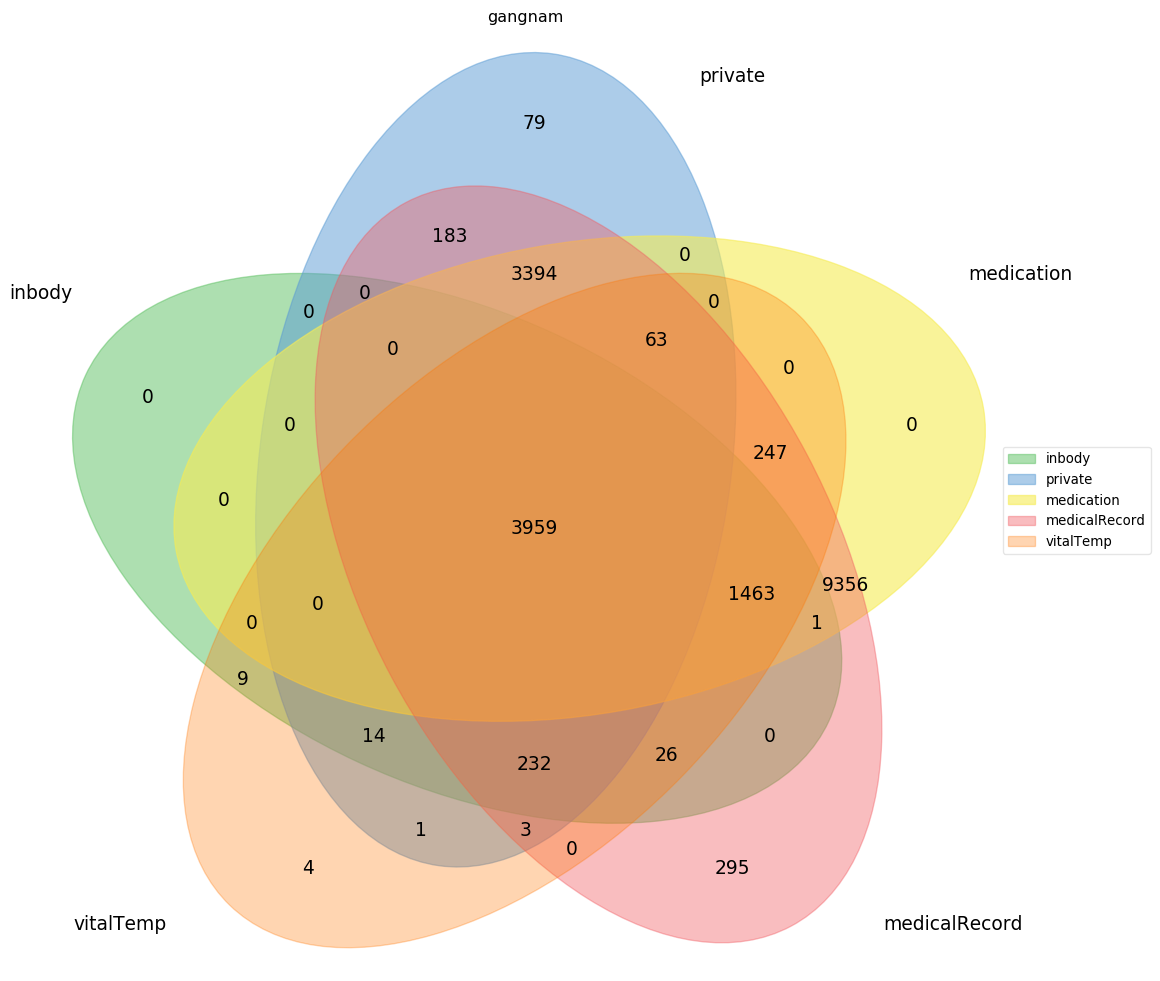

In [107]:
gangnam = commonIndexExtraction(region= 'gangnam')
gangnam.makeDir()
gangnam.fileList()
gangnam.dataSet()
gangnam.Tmedication()
gangnam.patientChartNo()
gangnam.commonPatientIDExtraction()
gangnam.commonDf()
gangnam.vennDiagram()

gangnam
이미 존재합니다.
All files are added


<Figure size 288x288 with 0 Axes>

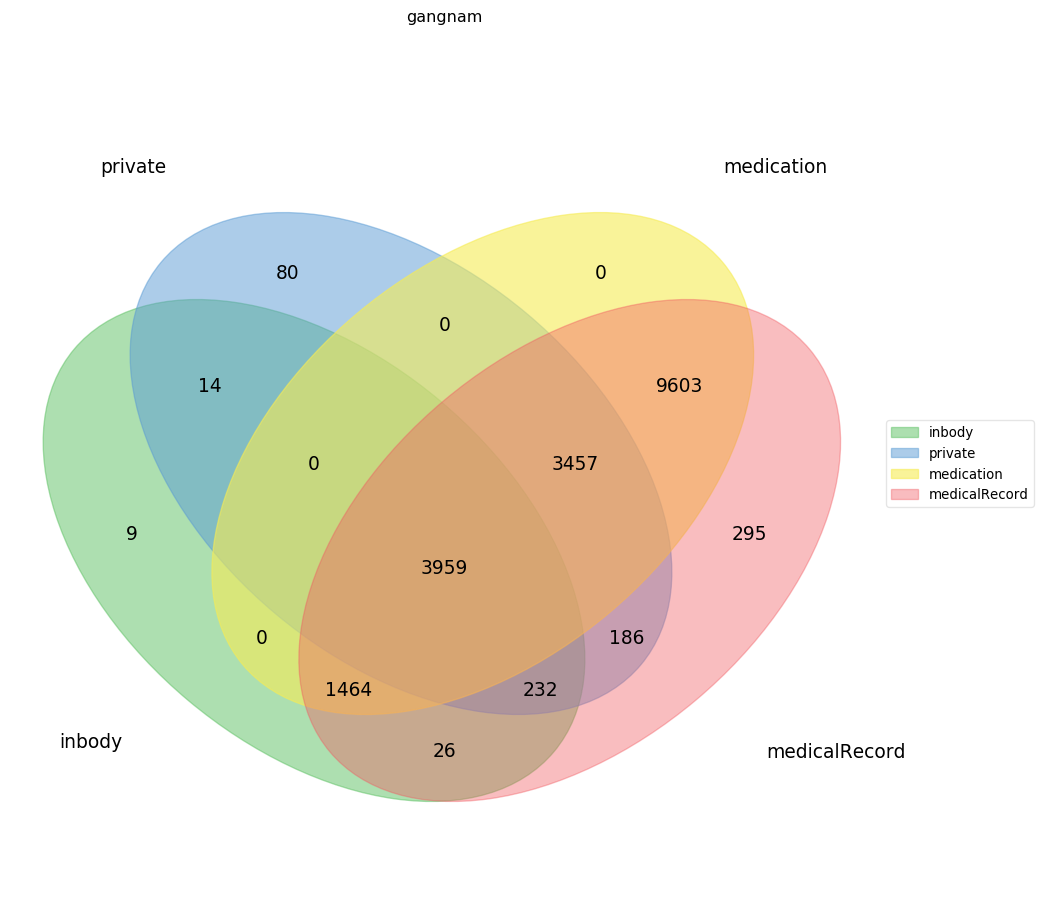

bucheon
이미 존재합니다.
All files are added


<Figure size 288x288 with 0 Axes>

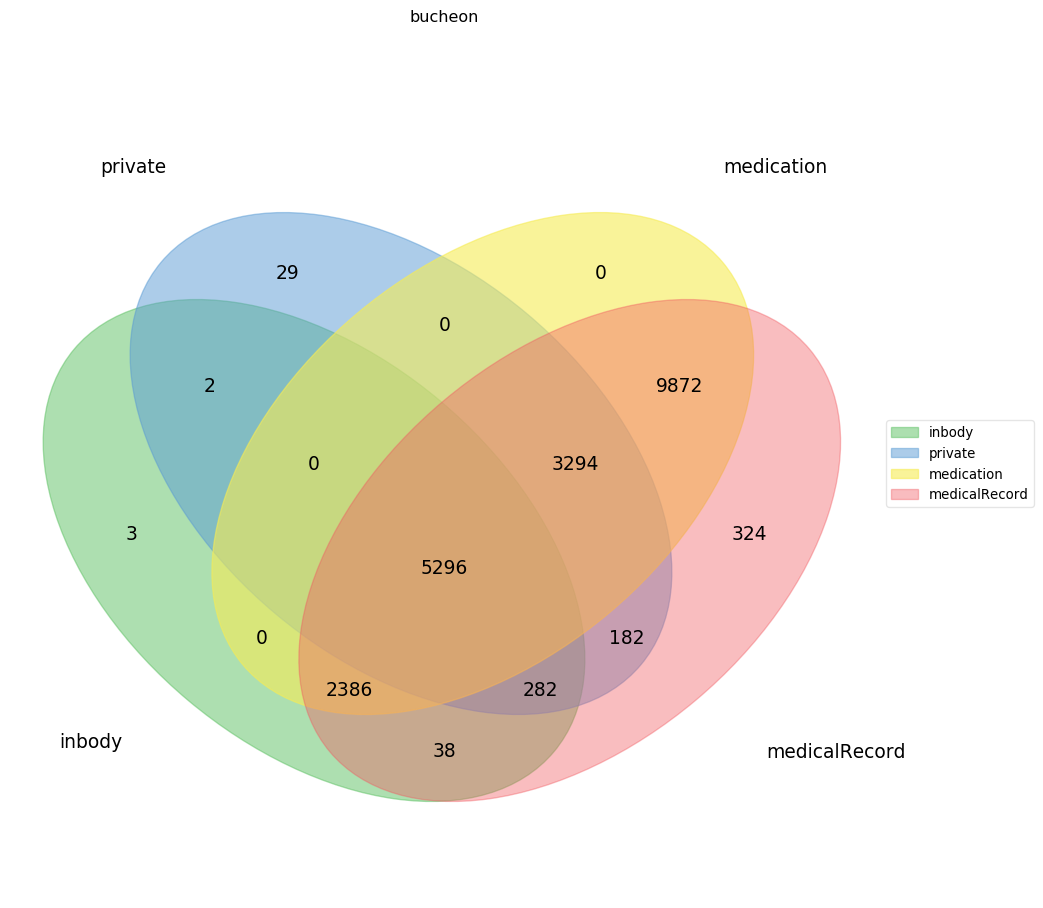

bundang
이미 존재합니다.
All files are added


<Figure size 288x288 with 0 Axes>

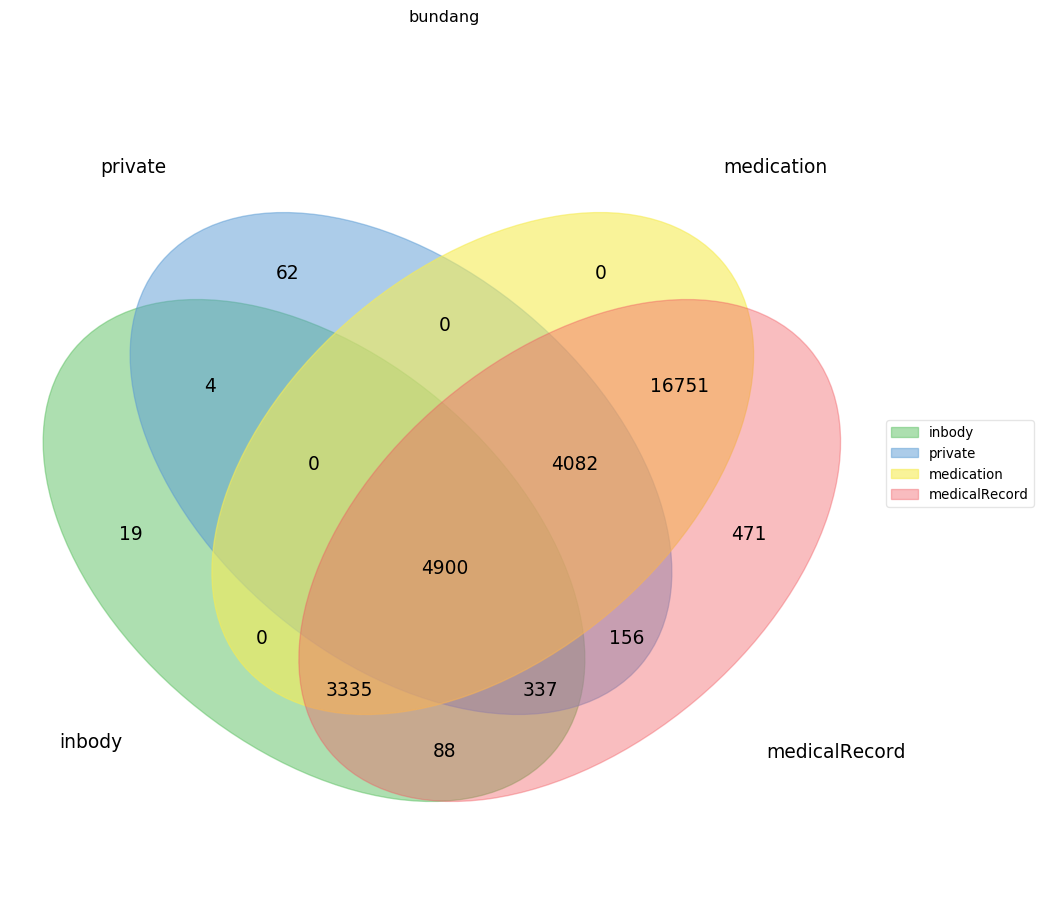

busan
이미 존재합니다.
All files are added


<Figure size 288x288 with 0 Axes>

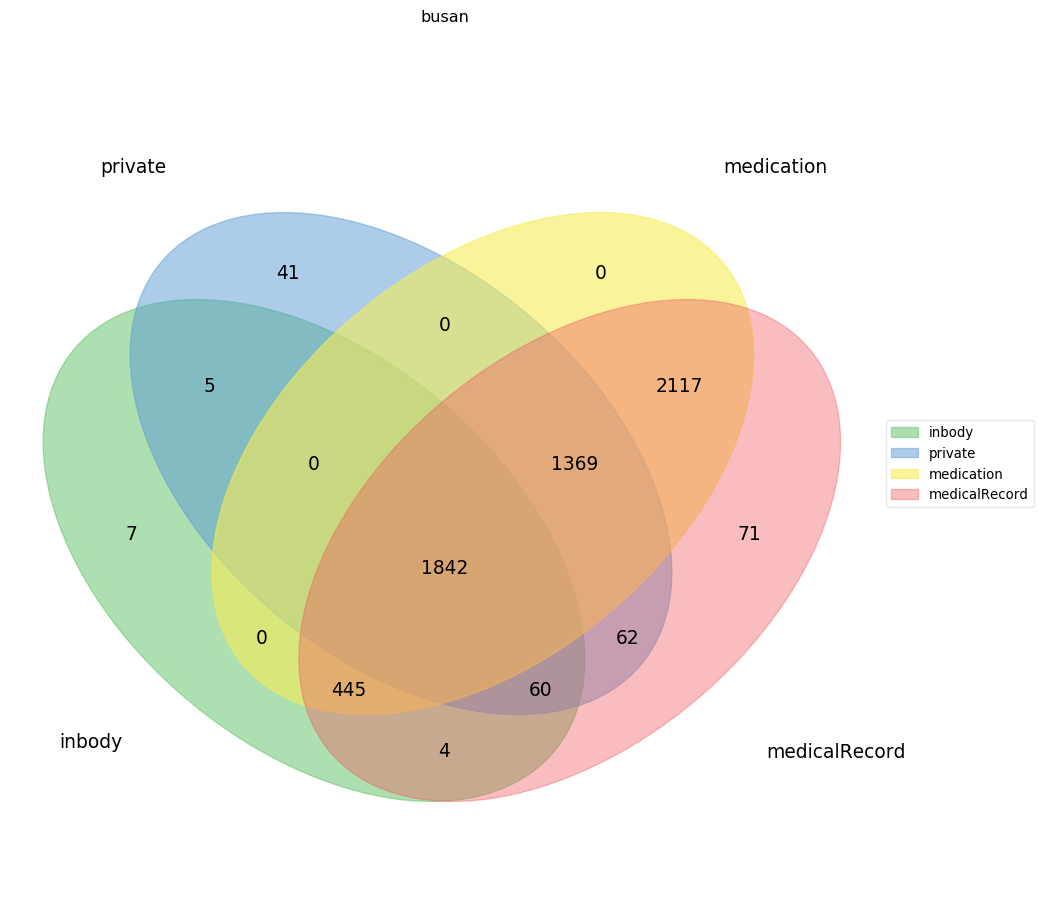

hongdae
이미 존재합니다.
All files are added


<Figure size 288x288 with 0 Axes>

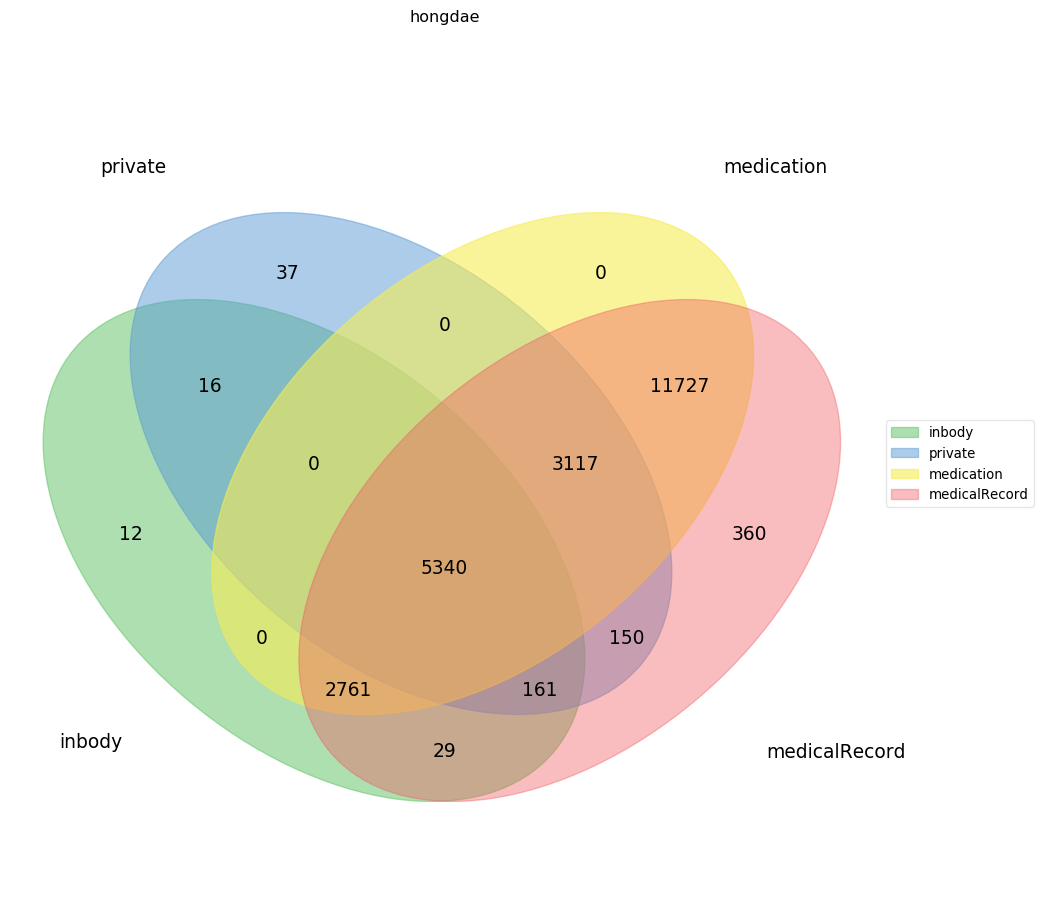

incheon
이미 존재합니다.
All files are added


<Figure size 288x288 with 0 Axes>

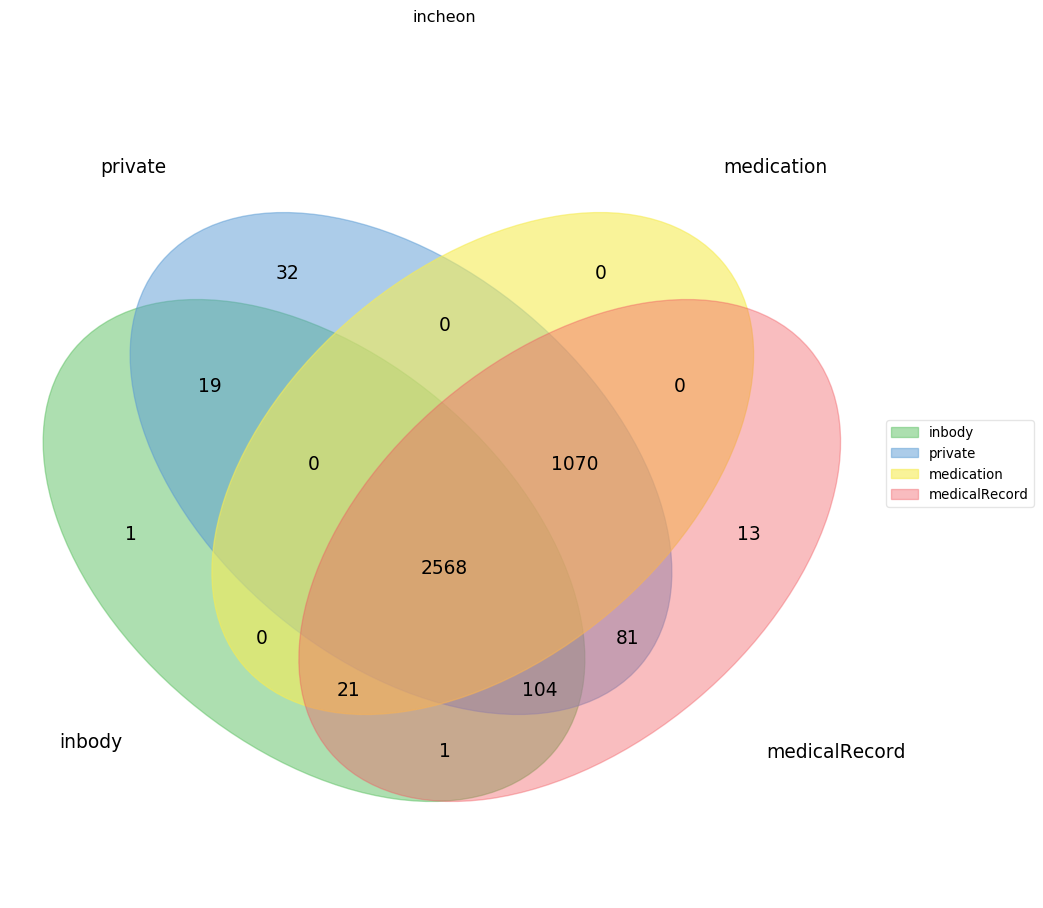

jamsil
이미 존재합니다.
All files are added


<Figure size 288x288 with 0 Axes>

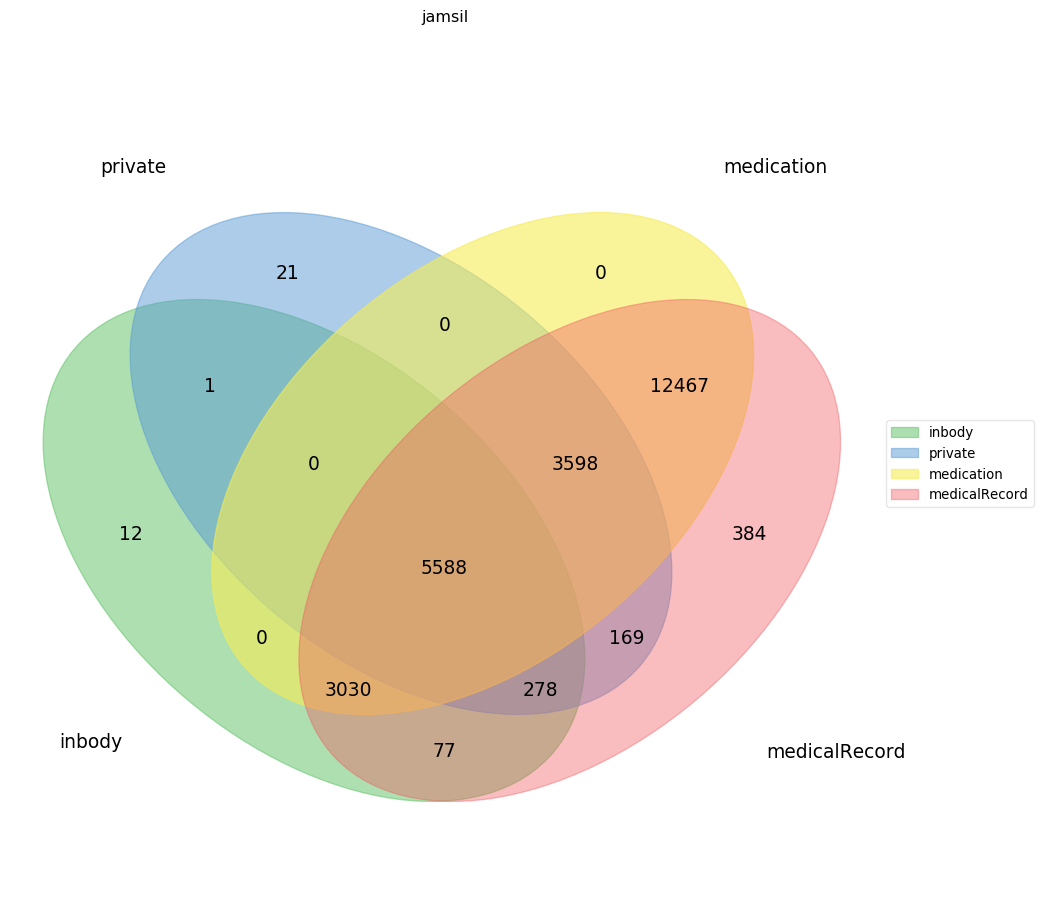

In [72]:
region_list=['gangnam', 'bucheon', 'bundang', 'busan', 'hongdae', 'incheon', 'jamsil']

for region in region_list:
    print(region)
    region_commonIndexExtraction = commonIndexExtraction(region = region)
    region_commonIndexExtraction.makeDir()
    region_commonIndexExtraction.fileList()
    region_commonIndexExtraction.dataSet()
    region_commonIndexExtraction.Tmedication()
    region_commonIndexExtraction.patientChartNo()
    region_commonIndexExtraction.commonPatientIDExtraction()
    region_commonIndexExtraction.commonDf()
    #데이터를 실제로 만드실땐 키시면 됩니다.
    #region_commonIndexExtraction.to_csv() 
    region_commonIndexExtraction.vennDiagram_imsi()
    #print(f'{region} finish')


gangnam
이미 존재합니다.
All files are added


<Figure size 864x576 with 0 Axes>

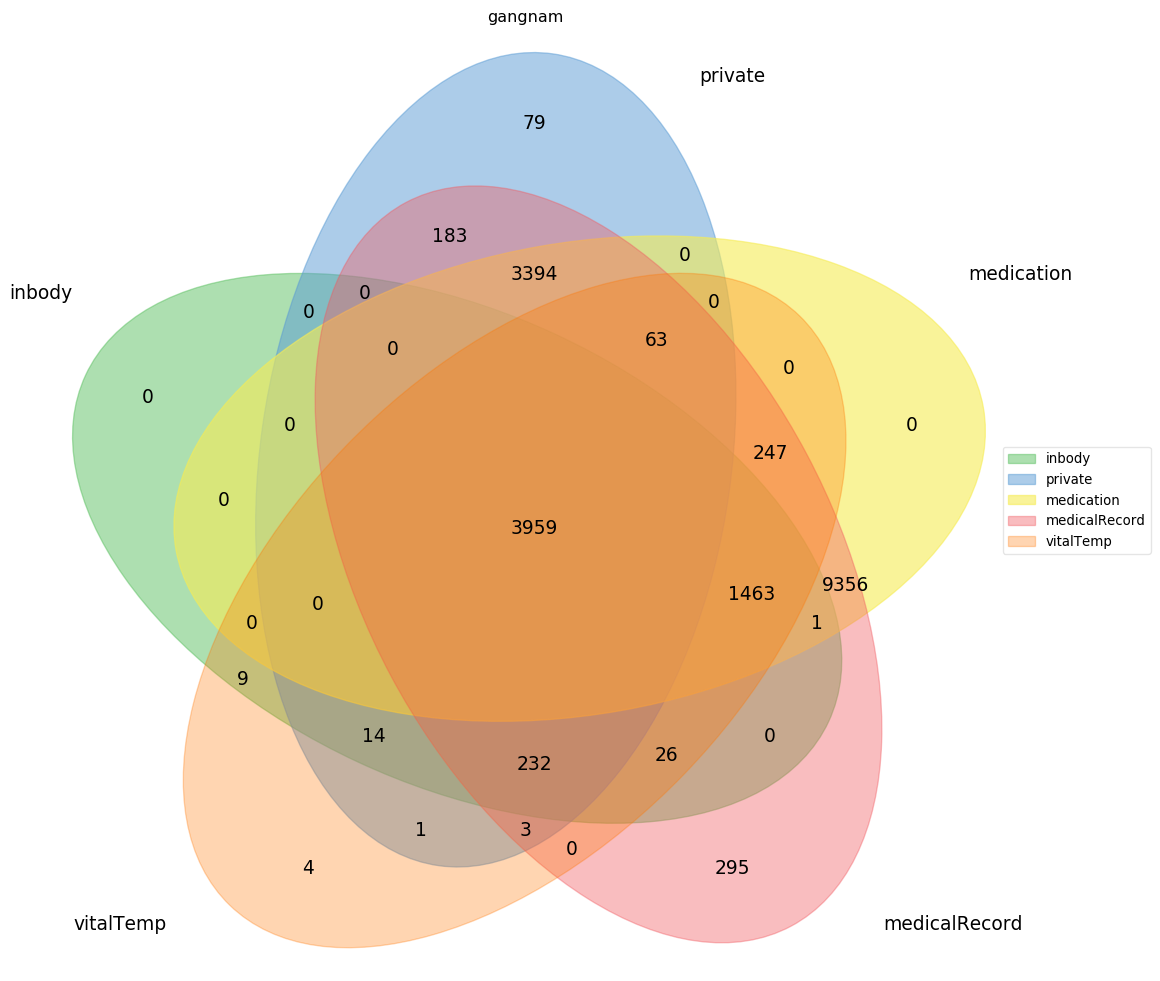

bucheon
이미 존재합니다.
All files are added


<Figure size 864x576 with 0 Axes>

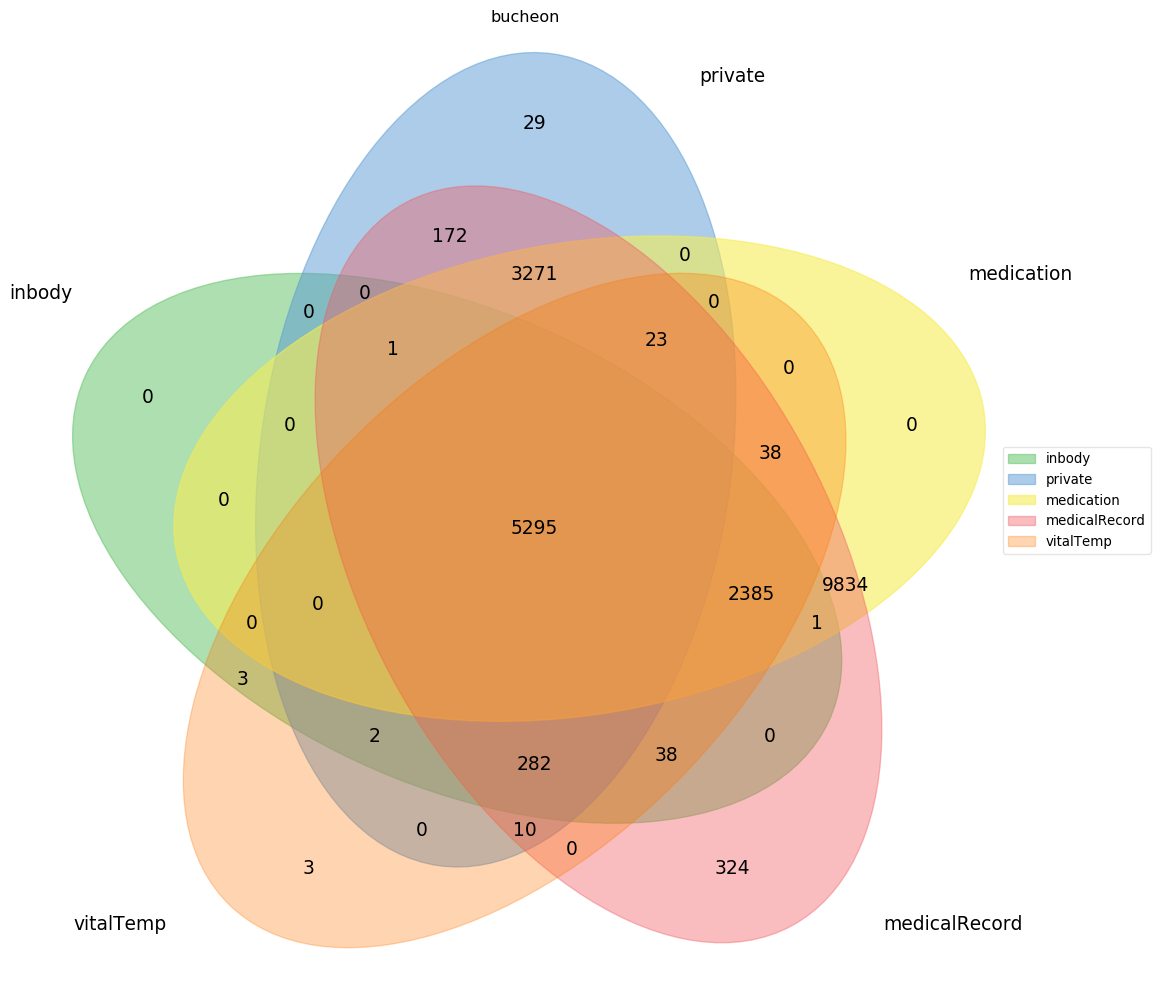

bundang
이미 존재합니다.
All files are added


<Figure size 864x576 with 0 Axes>

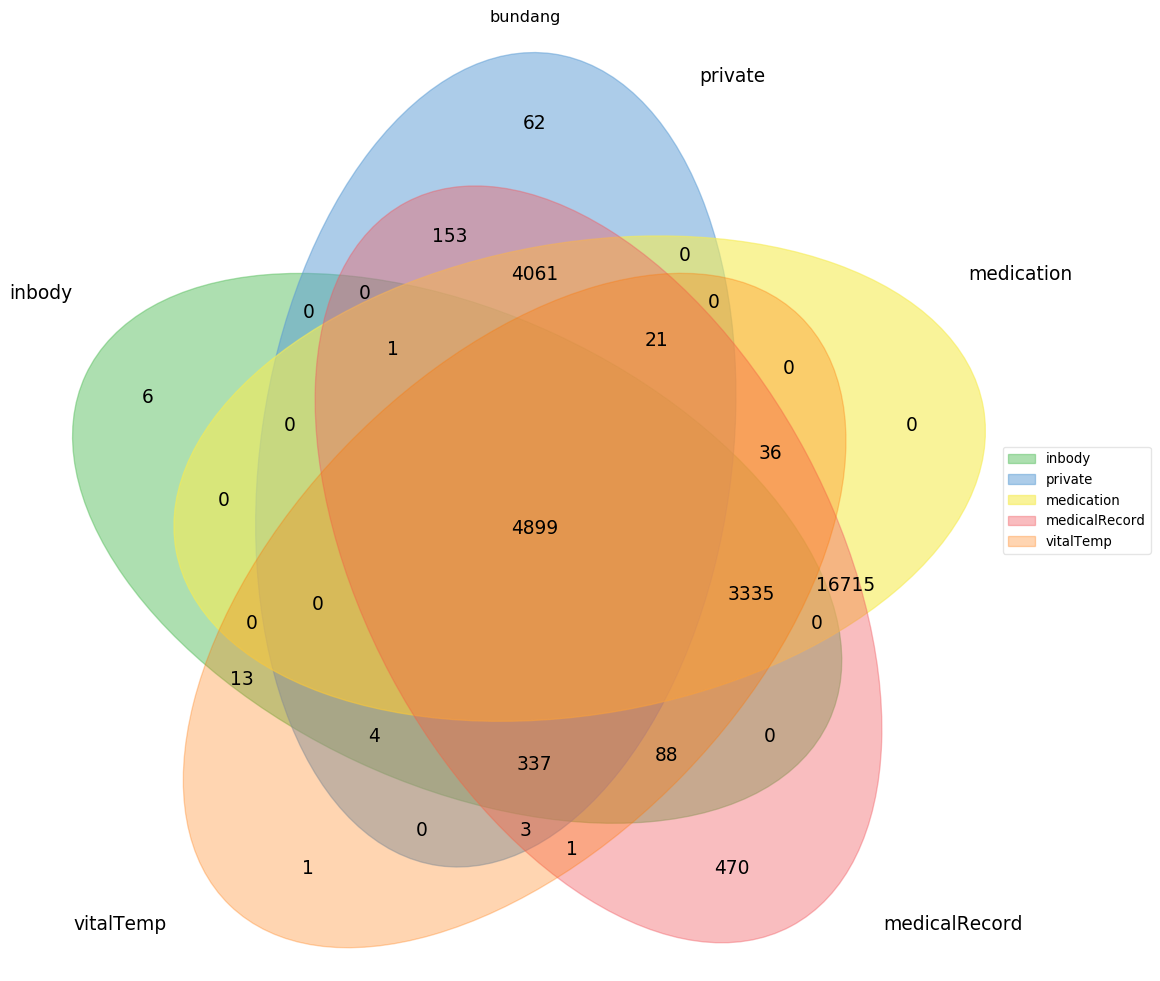

busan
이미 존재합니다.
All files are added


<Figure size 864x576 with 0 Axes>

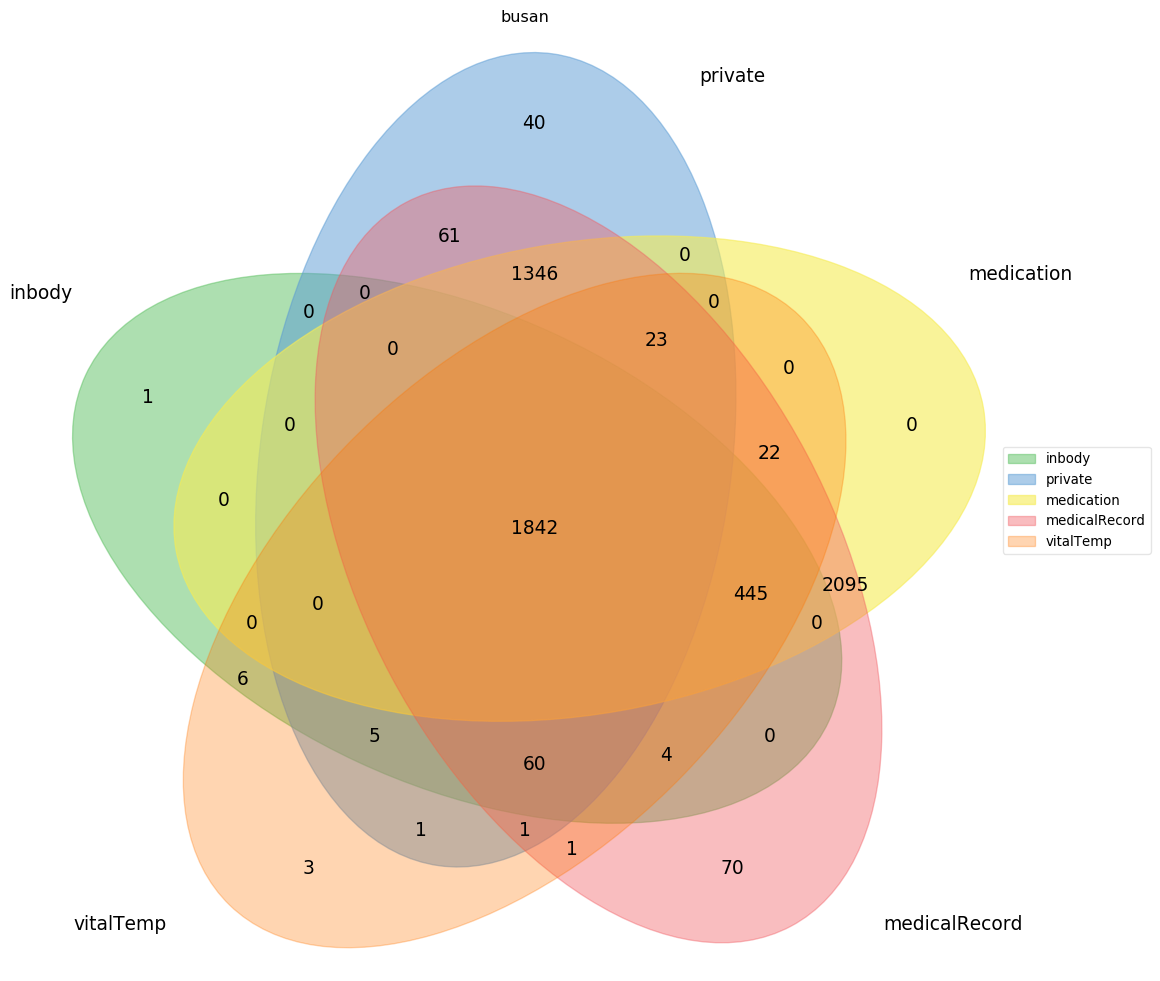

hongdae
이미 존재합니다.
All files are added


<Figure size 864x576 with 0 Axes>

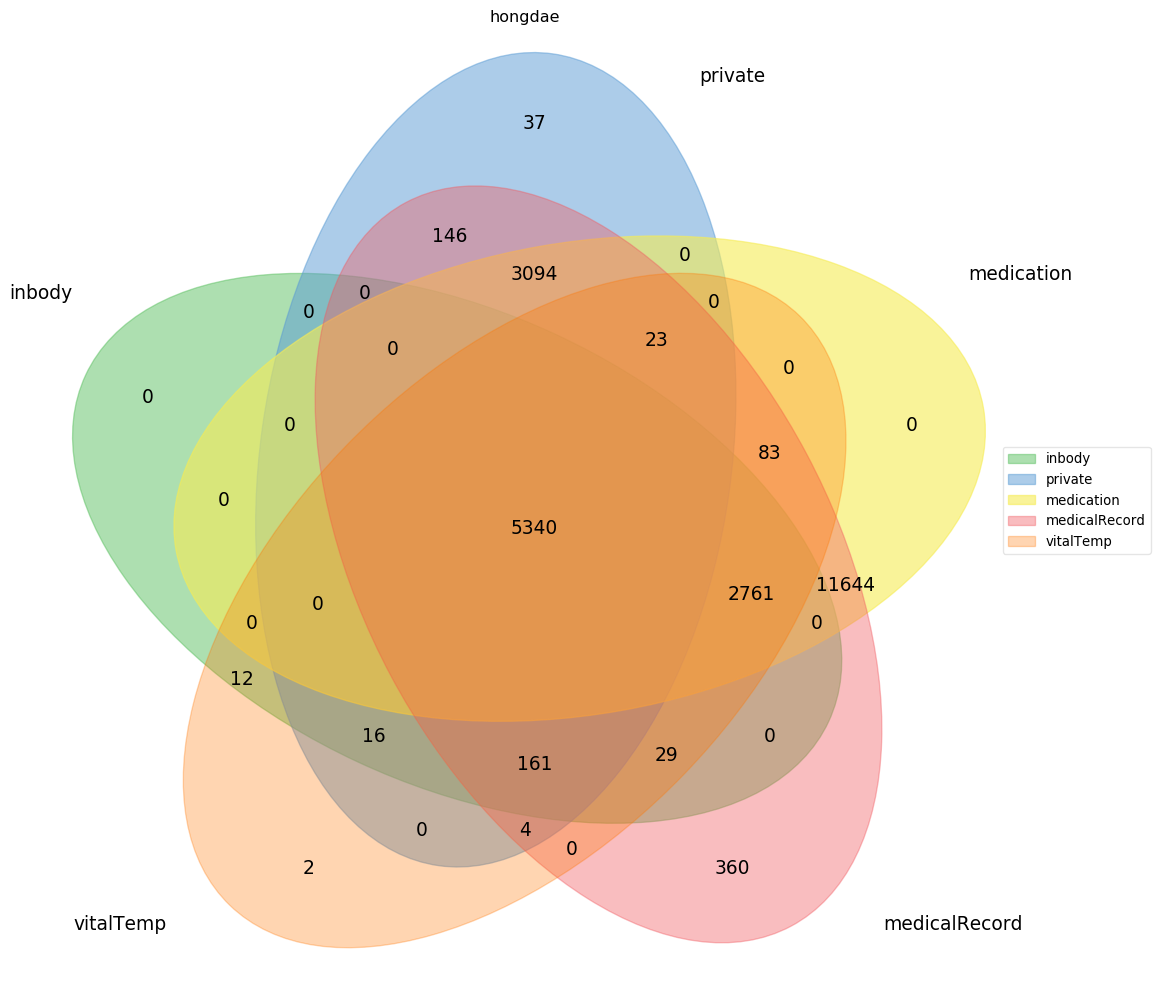

incheon
이미 존재합니다.
All files are added


<Figure size 864x576 with 0 Axes>

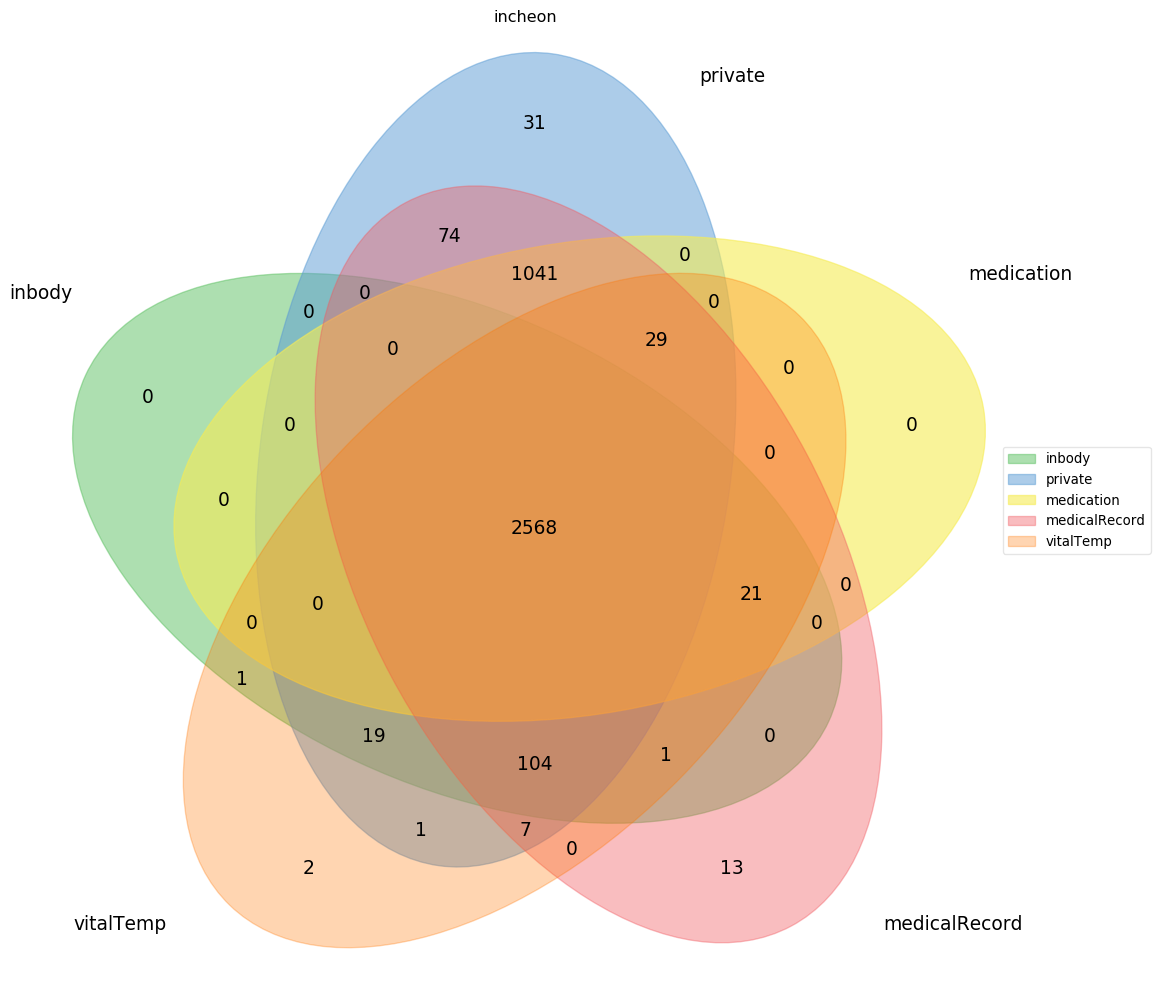

jamsil
이미 존재합니다.
All files are added


<Figure size 864x576 with 0 Axes>

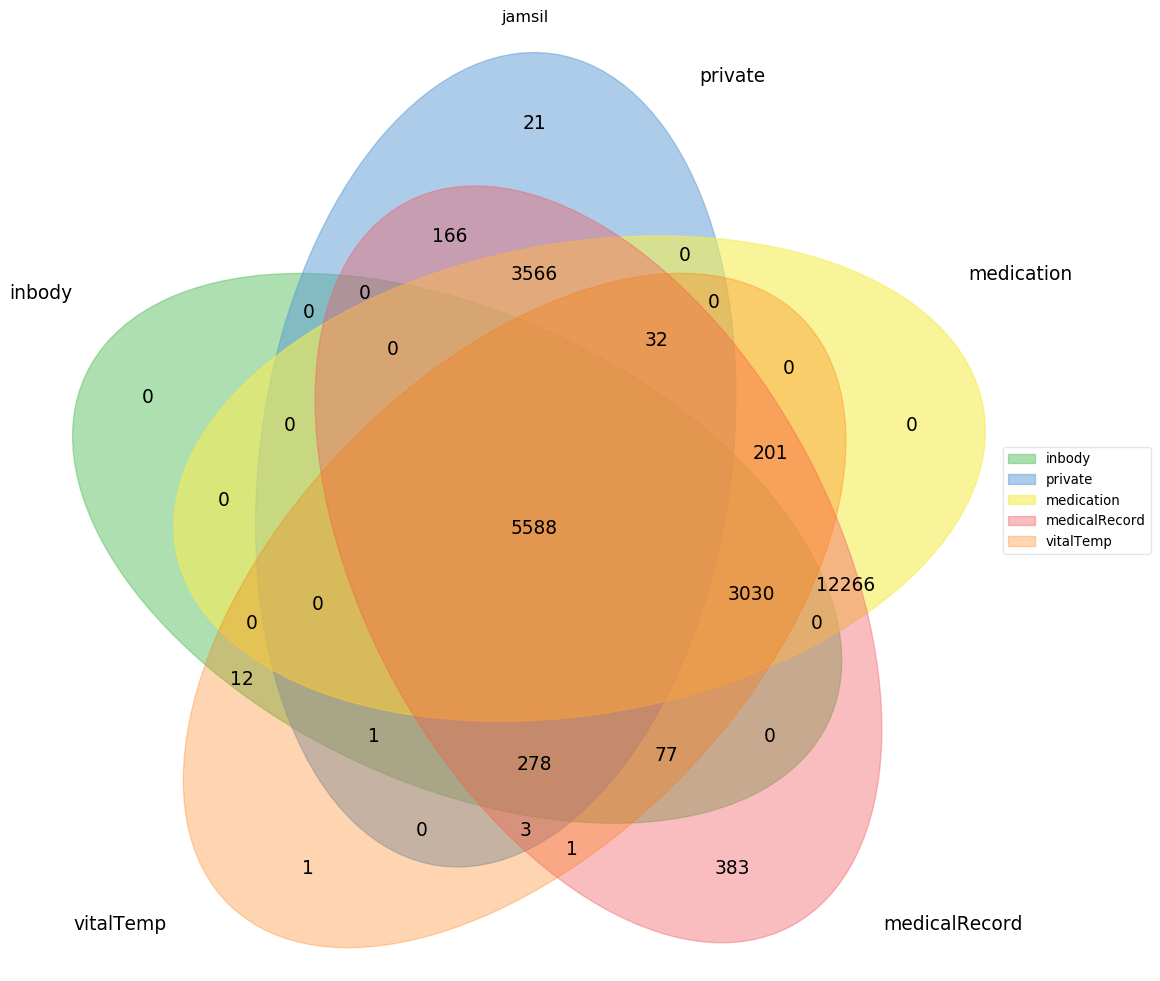

In [74]:
region_list=['gangnam', 'bucheon', 'bundang', 'busan', 'hongdae', 'incheon', 'jamsil']

for region in region_list:
    print(region)
    region_commonIndexExtraction = commonIndexExtraction(region = region)
    region_commonIndexExtraction.makeDir()
    region_commonIndexExtraction.fileList()
    region_commonIndexExtraction.dataSet()
    region_commonIndexExtraction.Tmedication()
    region_commonIndexExtraction.patientChartNo()
    region_commonIndexExtraction.commonPatientIDExtraction()
    region_commonIndexExtraction.commonDf()
    #데이터를 실제로 만드실땐 키시면 됩니다.
    #region_commonIndexExtraction.to_csv() 
    region_commonIndexExtraction.vennDiagram()
    #print(f'{region} finish')


이미 존재합니다.
All files are added
gangnam:19


<Figure size 864x576 with 0 Axes>

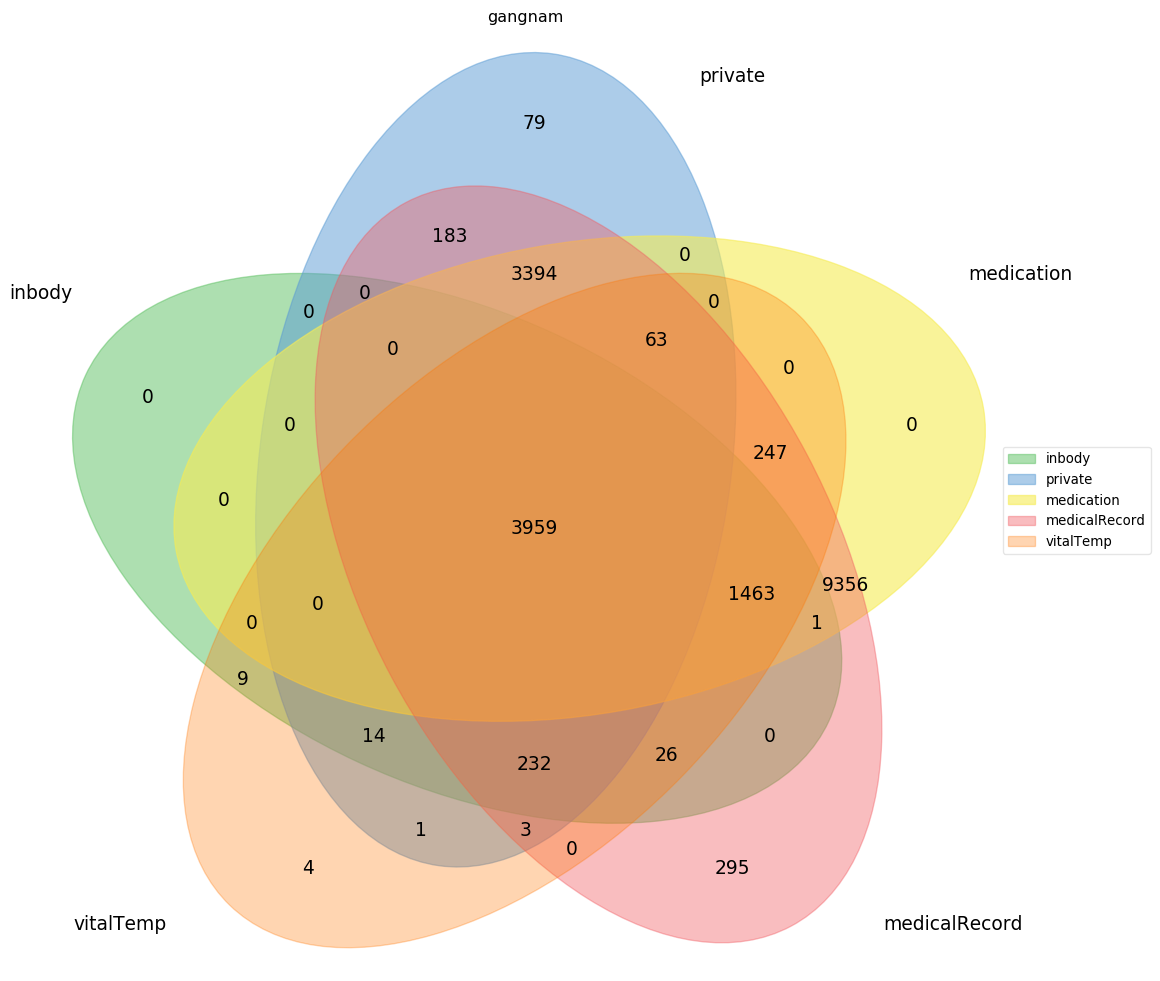

In [103]:
# 6분정도 걸림
gangnam = commonIndexExtraction(region= 'gangnam')
gangnam.makeDir()
gangnam.fileList()
gangnam.dataSet()
gangnam.Tmedication()
gangnam.patientChartNo()
gangnam.commonPatientIDExtraction()
gangnam.commonDf()
gangnam.vennDiagram()
#